In [1]:
pip install --upgrade tensorflow keras


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 66.6 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompat

In [2]:
!pip uninstall pandas -y
!pip install pandas


Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 57.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [3]:
pip install pandas tensorflow

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.utils import plot_model

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import os
os.chdir('/content/drive/MyDrive/DeepL2')

In [8]:
import pathlib

# Definisikan path ke direktori gambar di Google Drive
data_dir = pathlib.Path('/content/drive/MyDrive/DeepL2')

# Hitung jumlah gambar
image_count = len(list(data_dir.glob('*/*.jpg')))
print('Image Count :', image_count)

Image Count : 900


In [9]:
img_height = 224
img_width = 224

train_data = image_dataset_from_directory(data_dir, seed=123, image_size=(img_height, img_width), validation_split=0.2, subset='training')

Found 900 files belonging to 3 classes.
Using 720 files for training.


In [10]:
val_data = image_dataset_from_directory(data_dir, seed=123, image_size=(img_height, img_width), validation_split=0.1, subset='validation')

Found 900 files belonging to 3 classes.
Using 90 files for validation.


In [11]:
test_data = image_dataset_from_directory(data_dir, seed=123, image_size=(img_height, img_width), validation_split=0.1, subset='validation')

Found 900 files belonging to 3 classes.
Using 90 files for validation.


In [12]:
base_model = EfficientNetV2B0(input_shape=(224,224,3),include_top=False,weights="imagenet")

24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
model=Sequential(name='EfficientNetV2B0')
model.add(base_model)
model.add(MaxPooling2D())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(128,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "EfficientNetV2B0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetv2-b0 (Functional)       │ (None, 7, 7, 1280)          │       5,919,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 3, 3, 1280)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 3, 3, 1280)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 11520)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 11520)               │          46,080 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,474,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,441,882 (28.39 MB)

 Trainable params: 7,357,978 (28.07 MB)

 Non-trainable params: 83,904 (327.75 KB)

In [14]:
#Label
from pathlib import Path
image_dir = Path('/content/drive/MyDrive/DeepL')

#Dir
uji_dir = Path('/content/drive/MyDrive/DeepL2')

In [15]:
#Get filepaths and labels
filepaths_ = list(image_dir.glob(r'**/*.jpg'))
labels_ = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths_))

# Get filepaths and labels uji
filepaths_uji = list(uji_dir.glob(r'**/*.jpg'))
labels_uji = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths_uji))
print(labels_uji)

['plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik', 'plastik'

In [16]:
# Bangun model dengan memberikan input shape yang sesuai
model.build((None, 224, 224, 3))

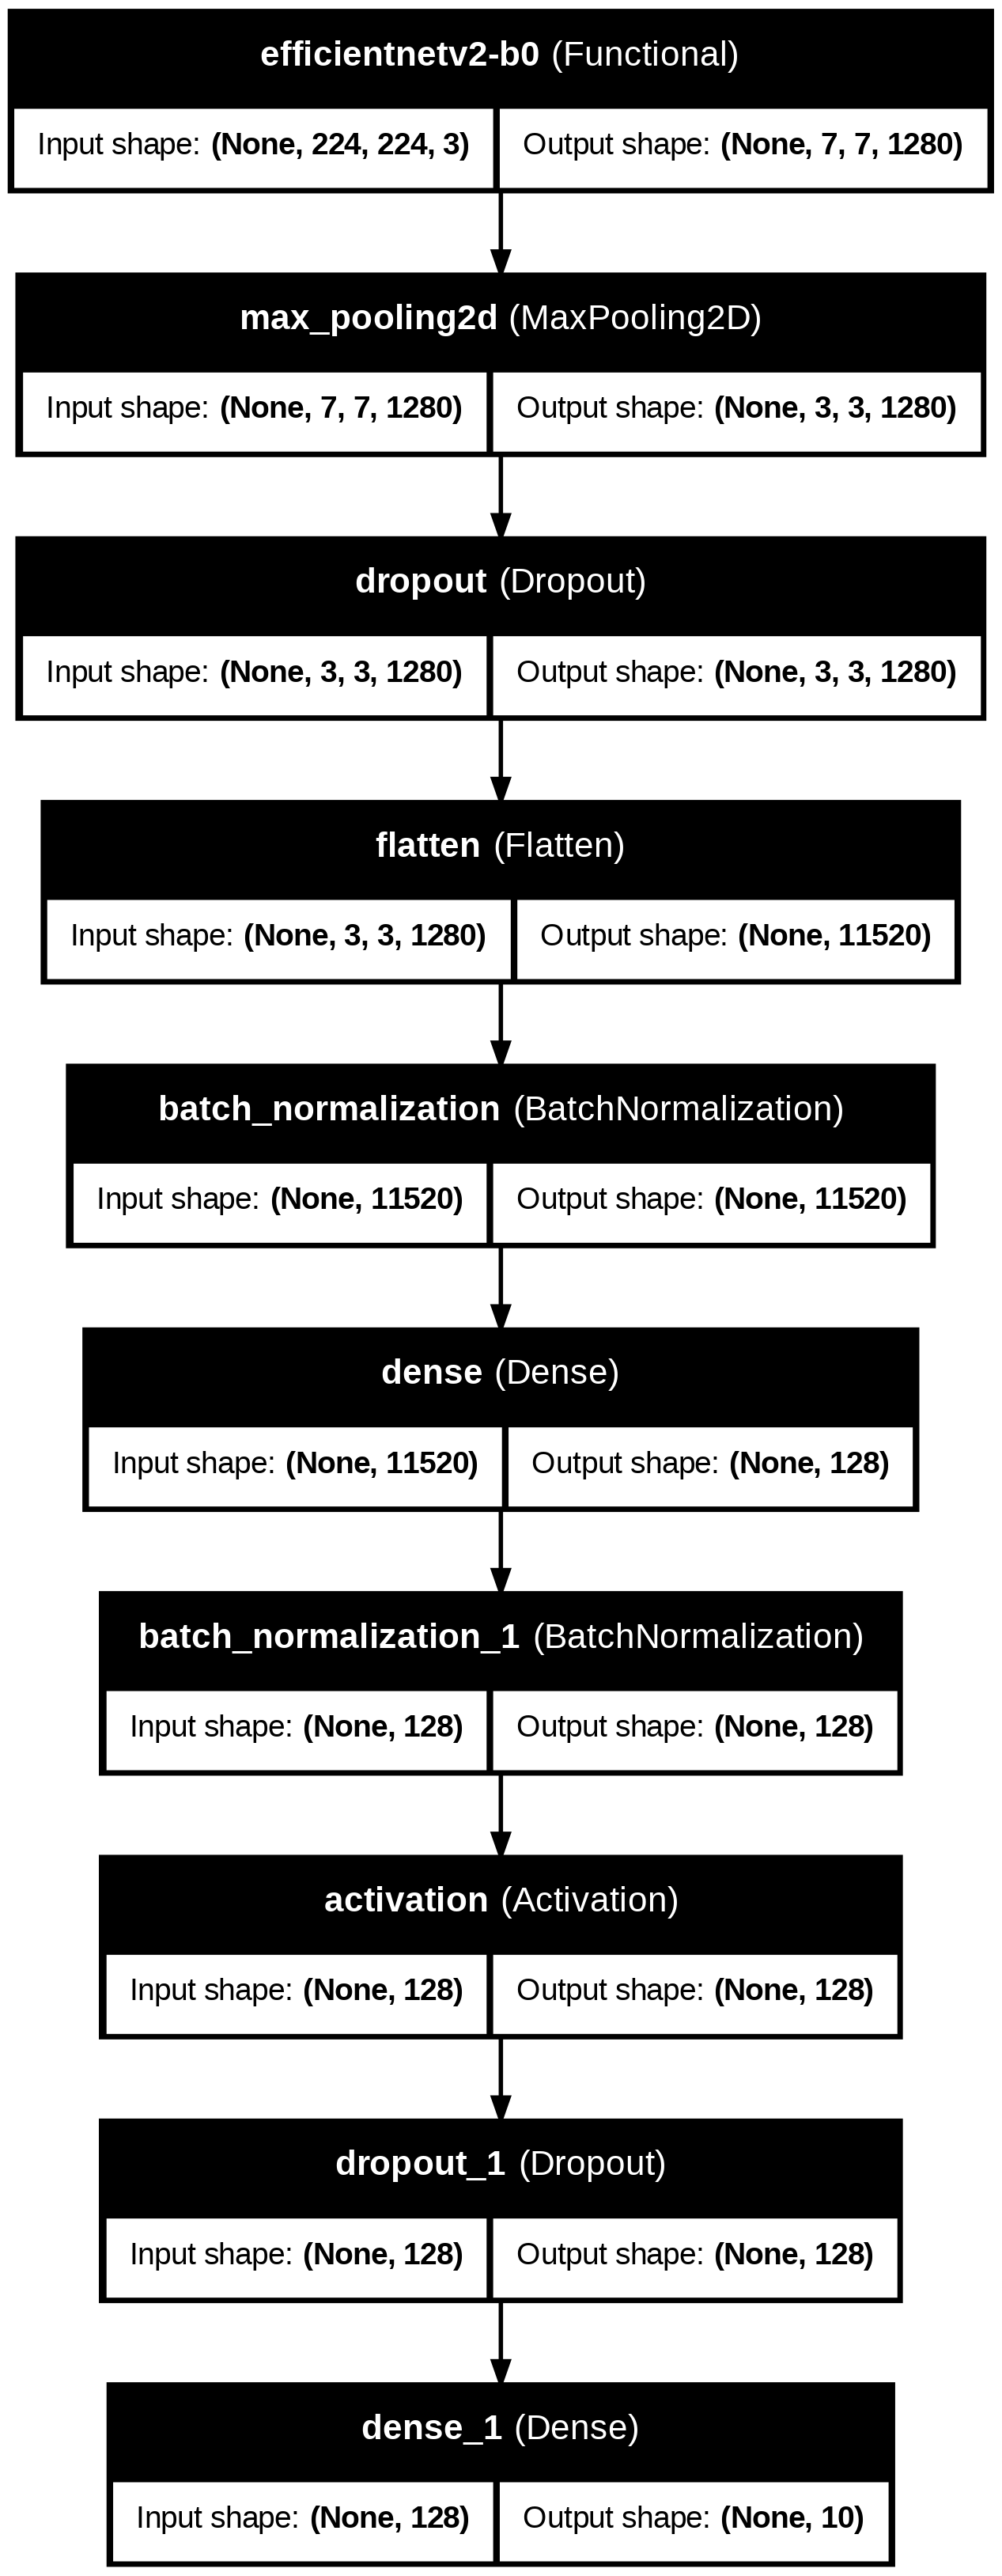

In [17]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [18]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss') < 0.05 and logs.get('val_accuracy') > 0.90):
      print("\Stopped, Akurasi mencapai 98%")
      self.model.stop_training = True;

In [19]:
from tensorflow.keras.callbacks import ModelCheckpoint

# path penyimpanan model
checkpoint_path = '/content/drive/MyDrive/model_DeepL/EfficientNet/efficientnet_model.keras'

# Callback ModelCheckpoint
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path,
                                      monitor='loss',
                                      save_best_only=True,
                                      save_weights_only=False,
                                      mode='min',
                                      verbose=1)

In [20]:
from tensorflow.keras.optimizers import Adam
# Set the training parameters
callbacks= myCallback()
model.compile(optimizer = Adam(learning_rate=0.0001),
              loss=SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

In [21]:
# Panggil model.fit di luar blok tf.function
with tf.device('/device:GPU:0'):
  history = model.fit(train_data, validation_data=val_data, epochs=10, batch_size=128, callbacks=[checkpoint_callback])

Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.1239 - loss: 2.8379
Epoch 1: loss improved from inf to 2.68872, saving model to /content/drive/MyDrive/model_DeepL/EfficientNet/efficientnet_model.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 271s 8s/step - accuracy: 0.1263 - loss: 2.8317 - val_accuracy: 0.2556 - val_loss: 2.5169
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - accuracy: 0.3268 - loss: 2.1340
Epoch 2: loss improved from 2.68872 to 2.07458, saving model to /content/drive/MyDrive/model_DeepL/EfficientNet/efficientnet_model.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 36s 194ms/step - accuracy: 0.3266 - loss: 2.1315 - val_accuracy: 0.5778 - val_loss: 1.4275
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.4720 - loss: 1.6419
Epoch 3: loss improved from 2.07458 to 1.52669, saving model to /content/drive/MyDrive/model_DeepL/EfficientNet/efficientnet_model.keras
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 251ms/step - accuracy: 0.4736 - loss: 1.6371 - val_accuracy: 0.7778 - val_

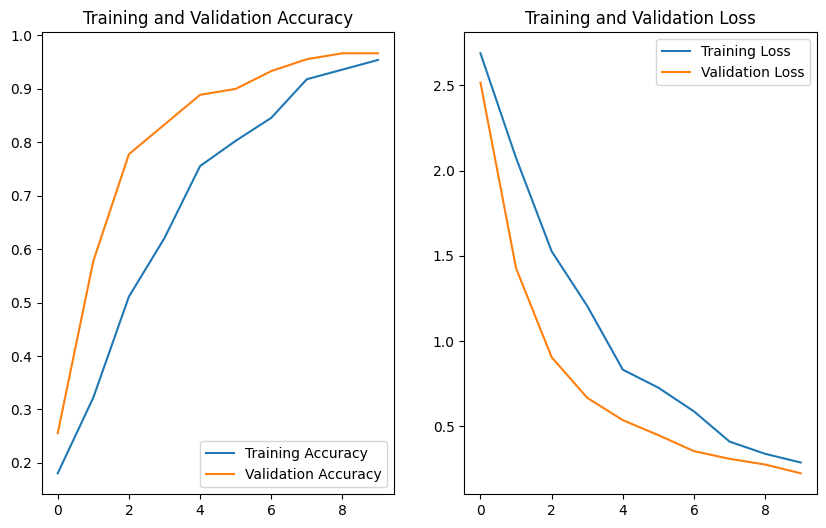

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = history.epoch

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [23]:
MODEL_BASE_PATH = "/content/drive/MyDrive/model_DeepL/EfficientNet"
PROJECT_NAME = "H5"
SAVE_MODEL_NAME = "EfficientNetV2B0.h5"
save_model_path = os.path.join(MODEL_BASE_PATH, PROJECT_NAME, SAVE_MODEL_NAME)
if os.path.exists(os.path.join(MODEL_BASE_PATH, PROJECT_NAME)) == False:
    os.makedirs(os.path.join(MODEL_BASE_PATH, PROJECT_NAME))

print('Saving Model At {}...'.format(save_model_path))
model.save(save_model_path,include_optimizer=False)

Saving Model At /content/drive/MyDrive/model_DeepL/EfficientNet/H5/EfficientNetV2B0.h5...


In [24]:
model.evaluate(test_data)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.9560 - loss: 0.2504


[0.22350095212459564, 0.9666666388511658]

In [25]:
y_pred = model.predict(test_data)

3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step


In [26]:
model.save('/content/drive/MyDrive/model_DeepL/Efficientnetv2BO/EfficientNetV2B0.h5')

In [27]:
labels = train_data.class_names
def predict(model, img):

    img_array = img.numpy()
    img_array = expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = labels[np.argmax(predictions[0])]
    confidence = round( (np.max(predictions[0])), 2)

    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


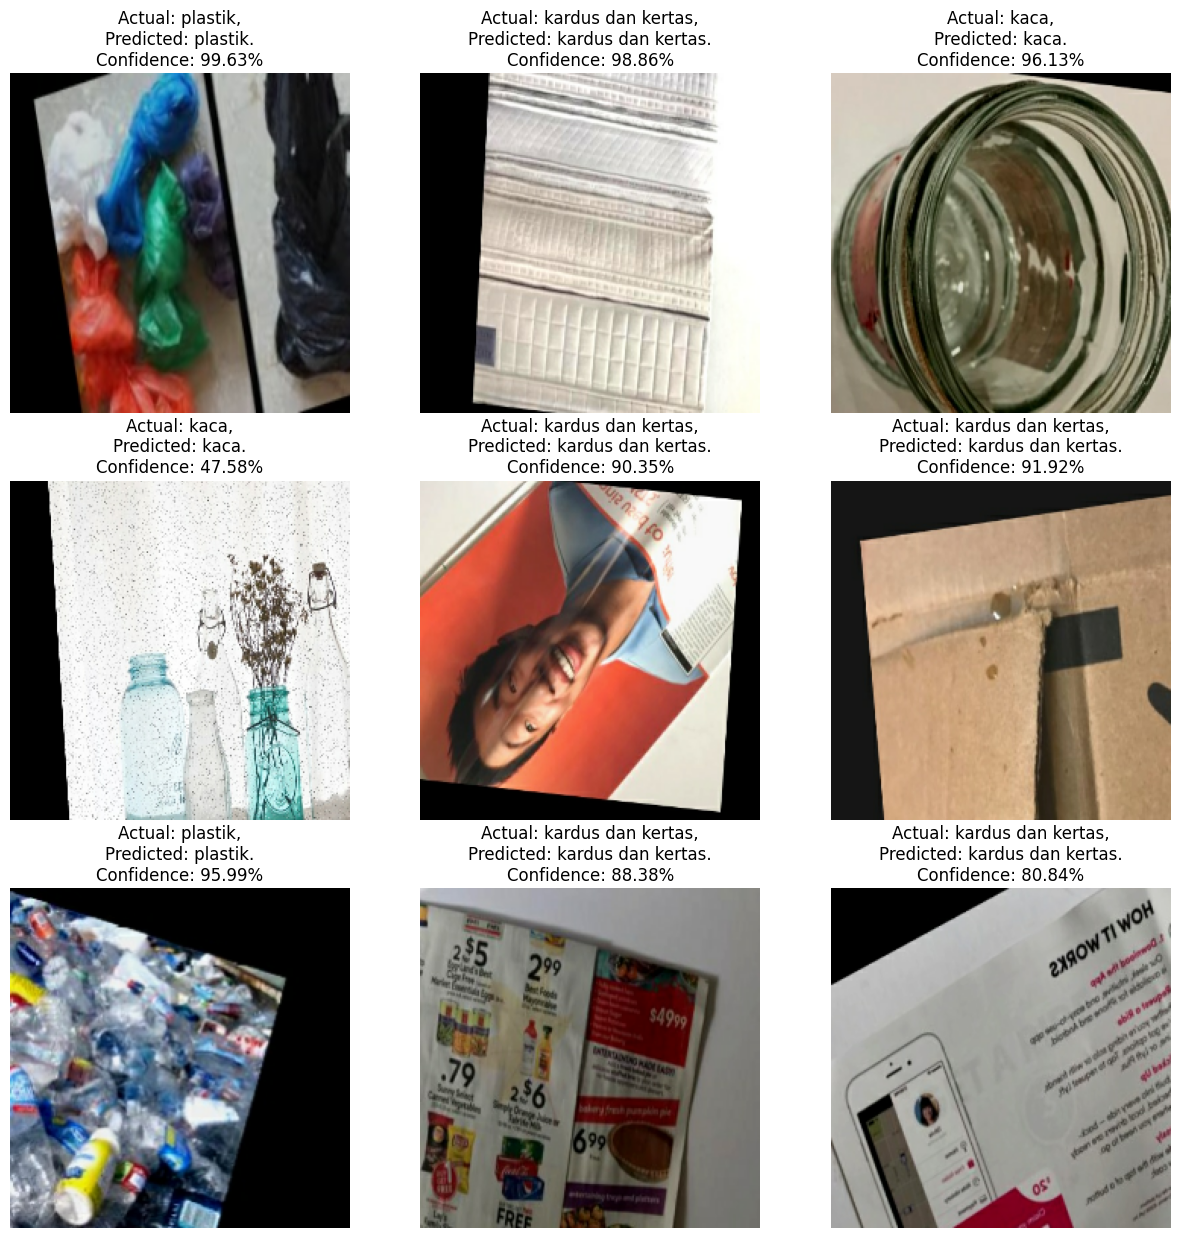

In [28]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import expand_dims

# Definisi fungsi prediksi
def predict(model, img):
    img_array = img.numpy()
    img_array = expand_dims(img_array, 0)  # batch dimension
    predictions = model.predict(img_array)
    predicted_class = predictions.argmax(axis=-1)[0]
    confidence = predictions.max(axis=-1)[0]
    return predicted_class, confidence


plt.figure(figsize=(15, 15))

for images, lbs in test_data.take(1):
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i])
        actual_class = labels[lbs[i].numpy()]

        plt.title(f"Actual: {actual_class},\nPredicted: {labels[predicted_class]}.\nConfidence: {confidence*100:.2f}%")
        plt.axis("off")

plt.show()


In [ ]:
model.save('Model_EfficientNetV2B0-2.h5')

In [39]:
import pathlib

data_dir = pathlib.Path('s82j8dh4rr-1')

In [40]:
import tensorflow as tf

model = tf.keras.models.load_model('/content/drive/MyDrive/model_DeepL/Efficientnetv2BO/EfficientNetV2B0.h5')

In [41]:
import numpy as np

predictions = model.predict(test_data)

y_pred = []
y_true = []

for image_batch, label_batch in test_data:
    y_true.append(label_batch)
    preds = model.predict(image_batch)
    y_pred.append(np.argmax(preds, axis = - 1))

true_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


In [42]:
from sklearn.metrics import classification_report

print(classification_report(true_labels, predicted_labels, target_names=['kaca','kardus dan kertas','plastik']))

                   precision    recall  f1-score   support

             kaca       0.97      0.97      0.97        31
kardus dan kertas       0.97      1.00      0.99        35
          plastik       0.96      0.92      0.94        24

         accuracy                           0.97        90
        macro avg       0.97      0.96      0.96        90
     weighted avg       0.97      0.97      0.97        90



1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
Prediksi: [[8.7983040e-05 2.9490239e-04 9.9365163e-01 1.4795534e-03 4.2817972e-04
  1.7344735e-04 4.7627412e-04 2.1506824e-04 3.6077570e-05 3.1567418e-03]]


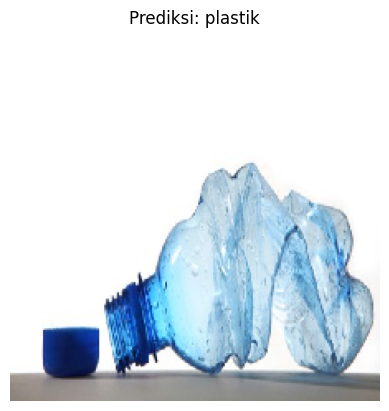

Prediksi label: plastik


In [46]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np


model = load_model('/content/drive/MyDrive/model_DeepL/Efficientnetv2BO/EfficientNetV2B0.h5')


img_path = '/content/77bahaya-botol-plastik.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = tf.keras.applications.efficientnet.preprocess_input(img_array)


predictions = model.predict(img_array)
print("Prediksi:", predictions)


class_labels = ['kaca','kardus dan kertas','plastik']  # Ganti dengan label kelas Anda
predicted_class = np.argmax(predictions, axis=1)
predicted_label = class_labels[predicted_class[0]]


plt.imshow(img)
plt.title(f'Prediksi: {predicted_label}')
plt.axis('off')
plt.show()
print("Prediksi label:", predicted_label)
